In [1]:
!jt -t monokai -T -N -kl

In [1]:
import sympy as sym
import numpy as np
import time
import cloudpickle
import matplotlib.pyplot as plt
import matplotlib.animation as ani
plt.style.use(['fivethirtyeight','seaborn-deep'])
from IPython.display import HTML

m = [0]*3

with open("Feasible_Solution/short1/steady-state.pkl", "rb") as f:
    m[1] = cloudpickle.load(f)
    
with open("Feasible_Solution/short1/accel.pkl", "rb") as f:
    m[0] = cloudpickle.load(f)
    
with open("Feasible_Solution/short1/decel.pkl", "rb") as f:
    m[2] = cloudpickle.load(f)
    
N = m[0].N[-1]

cN = m[0].cN[-1]

    (ordered) position is deprecated.  Please use at()  (deprecated in 6.1,
    will be removed in 7.0) (called from /tmp/ipykernel_6260/2306062902.py:21)
    (ordered) position is deprecated.  Please use at()  (deprecated in 6.1,
    will be removed in 7.0) (called from /tmp/ipykernel_6260/2306062902.py:23)


/tmp/ipykernel_6260/2508150792.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(time[n], R[n], 'k.', c='red')
/tmp/ipykernel_6260/2508150792.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(time[n], L[n], 'k.', c='black')
/tmp/ipykernel_6260/2508150792.py:63: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(time[n], A[n], 'k.', c='blue')


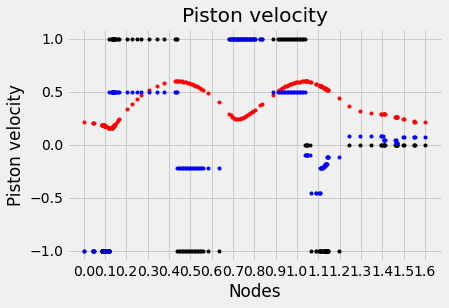

/tmp/ipykernel_6260/2508150792.py:77: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(time[n], R[n], 'k.', c='red')
/tmp/ipykernel_6260/2508150792.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(time[n], P[n], 'k.', c='black')
/tmp/ipykernel_6260/2508150792.py:79: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(time[n], V[n], 'k.', c='blue')


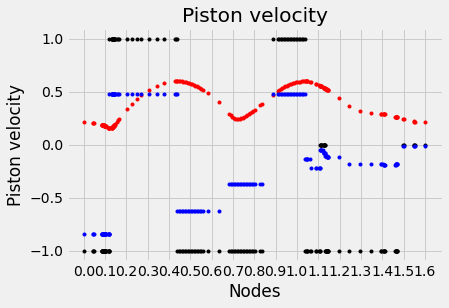

In [4]:
# servo stuff

R = []
L = []
A = []
time = []
cN_time = []
cN_adder = 0
adder = 0
P = []
V = []

for i in range(0, 3):
    if(i>0):
        cN_adder += (m[i-1].tt[N,cN].value - m[i-1].tt[1,1].value)
    for n in range(1, N+1):
        for c in range(1, cN+1):
            cN_time.append(m[i].tt[n,c].value - m[i].tt[1,1].value + cN_adder)
            
for i in range(0, 3):
    if(i>0):
        adder += (m[i-1].tt0[N].value - m[i-1].tt0[1].value)
    for n in range(1, N+1):
        time.append(m[i].tt0[n].value - m[i].tt0[1].value + adder)

# for i in range(0, 3):
#     for n in range(1, N+1):
#         for c in range(1, cN+1):
#             R.append(m[i].dq[n,c,'z'].value)


for i in range(0, 3):
    for n in range(1, N+1):
        R.append(m[i].q0[n,'z'].value)
        Fnet_L = (m[i].Fbang_pos_L[n].value - m[i].Fbang_neg_L[n].value)
        Fnet_R = (m[i].Fbang_pos_R[n].value - m[i].Fbang_neg_R[n].value)
#         print(Fnet_L)
        if Fnet_L > 0.12:
            L.append(np.ceil(Fnet_L))
        elif Fnet_L < -0.12:
            L.append(np.floor(Fnet_L))
        else:
            L.append(np.round(Fnet_L))
        
        if Fnet_R > 0.12:
            P.append(np.ceil(Fnet_R))
        elif Fnet_R < -0.12:
            P.append(np.floor(Fnet_R))
        else:
            P.append(np.round(Fnet_R))

plt.axes()
t = np.arange(0, 5, 0.1)
plt.xticks(t)
ty = np.arange(-5, 5, 0.5)
plt.yticks(ty)
plt.grid(True)
for n in range (0,len(R)):
    plt.plot(time[n], R[n], 'k.', c='red')
    plt.plot(time[n], L[n], 'k.', c='black')
    plt.xlabel('Nodes')
    plt.ylabel('Piston velocity')
    plt.title('Piston velocity')
plt.show()

plt.axes()
t = np.arange(0, 5, 0.1)
plt.xticks(t)
ty = np.arange(-5, 5, 0.5)
plt.yticks(ty)
plt.grid(True)
for n in range (0,len(R)):
#     print(A[n])
    plt.plot(time[n], R[n], 'k.', c='red')
    plt.plot(time[n], P[n], 'k.', c='black')
    plt.xlabel('Nodes')
    plt.ylabel('Piston velocity')
    plt.title('Piston velocity')
plt.show()



In [3]:
# print(V)
# print(np.round(-0.012207837182170944))

[-0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, -0.8431947552011976, 0.482037972438365, 0.482037972438365, 0.482037972438365, 0.482037972438365, 0.482037972438365, 0.482037972438365, 0.482037972438365, 0.482037972438365, 0.482037972438365, 0.482037972438365, 0.482037972438365, 0.482037972438365, 0.482037972438365, 0.482037972438365, 0.482037972438365, 0.482037972438365, 0.482037972438365, 0.482037972438365, 0.482037972438365, 0.482037